<a href="https://colab.research.google.com/github/AbdulWahabRaza123/FYP_ML/blob/main/ReportGenerationPreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# for parsing and creating xml data 
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
# to create progress bar for preprocessing or trainning
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
# to provide default value for nonexisting key 
from collections import defaultdict

###To Load Data

In [6]:
!gdown "https://drive.google.com/drive/u/0/my-drive"

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/0/my-drive
To: /content/my-drive
568kB [00:00, 51.0MB/s]


In [8]:
#for higher level operations of file
import shutil

In [9]:
columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)

In [10]:
len(os.listdir("/content/drive/MyDrive/FYP/images"))

7466

In [12]:
reports=pd.read_csv("/content/drive/MyDrive/FYP/indiana_reports.csv")
reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [13]:
projections=pd.read_csv("/content/drive/MyDrive/FYP/indiana_projections.csv")
projections.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [19]:
df=pd.merge(reports, projections, on="uid")
df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
4,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,Frontal


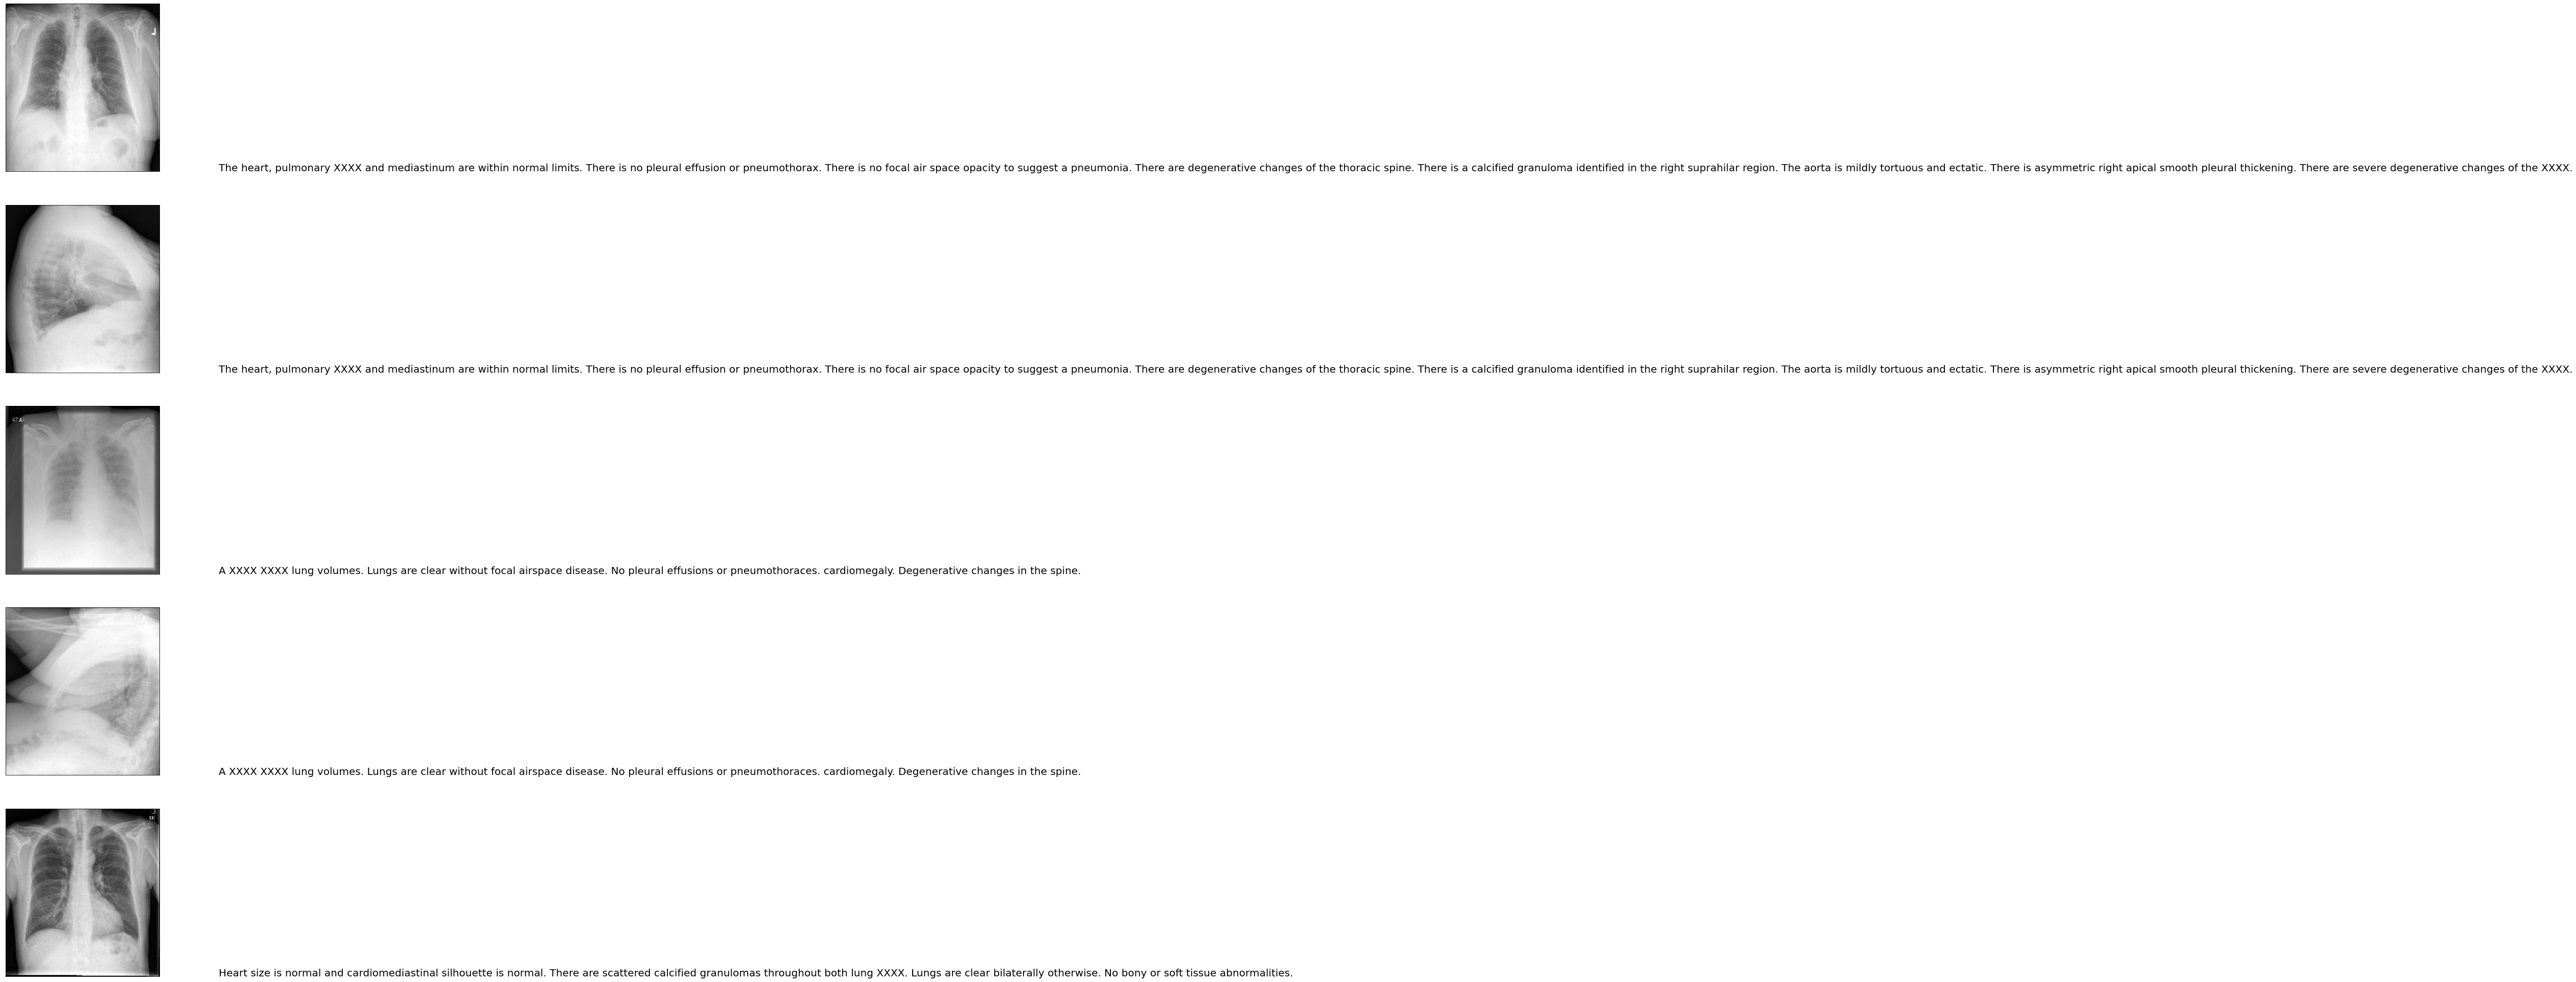

In [33]:
count = 1  
fig = plt.figure(figsize=(15,35))

for filename in df['filename'].values[95:100]:
    findings = list(df["findings"].loc[df["filename"] == filename].values)
    img = cv2.imread("/content/drive/MyDrive/FYP/images/"+filename)  
    ax = fig.add_subplot(5, 2 , count , xticks=[], yticks=[])  
    ax.imshow(img)
    count += 1
    ax = fig.add_subplot(5 ,2 ,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(findings))
    for i, f in enumerate(findings):
        ax.text(0,i,f,fontsize=20)
    count += 1 
plt.show()

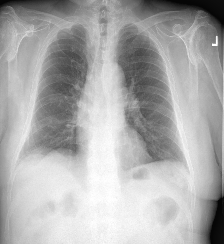

In [30]:
  from google.colab.patches import cv2_imshow
img=cv2.imread("/content/drive/MyDrive/FYP/images/49_IM-2110-1001.dcm.png")
cv2_imshow(img)

In [35]:
# number of missing values
df.isnull().sum()

uid              0
MeSH             0
Problems         0
image            0
indication     159
comparison    1157
findings       997
impression      52
filename         0
projection       0
dtype: int64

In [40]:
data = df[['uid','findings','filename']]
data.head()

,uid,findings,filename
0,1,The cardiac silhouette and mediastinum size ar...,1_IM-0001-4001.dcm.png
1,1,The cardiac silhouette and mediastinum size ar...,1_IM-0001-3001.dcm.png
2,2,Borderline cardiomegaly. Midline sternotomy XX...,2_IM-0652-1001.dcm.png
3,2,Borderline cardiomegaly. Midline sternotomy XX...,2_IM-0652-2001.dcm.png
4,3,NaN,3_IM-1384-1001.dcm.png


In [41]:
data.shape

(7466, 3)

In [42]:
data.isnull().sum()

uid           0
findings    997
filename      0
dtype: int64

In [43]:
data = data.dropna(axis=0) # drop all missing value rows

In [44]:
#after droping missing values again checking missing values from the data
data.isnull().sum()

uid         0
findings    0
filename    0
dtype: int64

In [45]:
data.shape

(6469, 3)

'There are diffuse bilateral interstitial and alveolar opacities consistent with chronic obstructive lung disease and bullous emphysema. There are irregular opacities in the left lung apex, that could represent a cavitary lesion in the left lung apex.There are streaky opacities in the right upper lobe, XXXX scarring. The cardiomediastinal silhouette is normal in size and contour. There is no pneumothorax or large pleural effusion.'

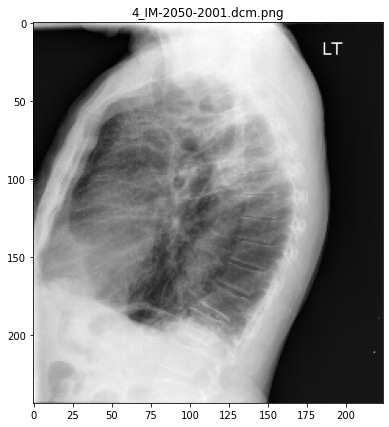

In [47]:
plt.figure(figsize=(8,7))
img = cv2.imread("/content/drive/MyDrive/FYP/images/"+data['filename'].values[5])
plt.imshow(img)
plt.title(data['filename'].values[5])
data['findings'].values[5]

In [49]:
data.filename

0          1_IM-0001-4001.dcm.png
1          1_IM-0001-3001.dcm.png
2          2_IM-0652-1001.dcm.png
3          2_IM-0652-2001.dcm.png
6          4_IM-2050-1001.dcm.png
                  ...            
7457    3995_IM-2046-2001.dcm.png
7458    3996_IM-2047-1001.dcm.png
7459    3996_IM-2047-3001.dcm.png
7460    3997_IM-2048-1001.dcm.png
7461    3997_IM-2048-1002.dcm.png
Name: filename, Length: 6469, dtype: object

In [61]:
images = {}
findings = {}

for img,fin in data[['filename','findings']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else: 
        images[a] += 1
        findings[a] = fin

In [62]:
images

{'1_IM-0001': 2,
 '2_IM-0652': 2,
 '4_IM-2050': 2,
 '5_IM-2117': 2,
 '6_IM-2192': 2,
 '7_IM-2263': 2,
 '8_IM-2333': 2,
 '9_IM-2407': 2,
 '10_IM-0002': 2,
 '11_IM-0067': 2,
 '12_IM-0133': 2,
 '13_IM-0198': 2,
 '14_IM-0256': 2,
 '15_IM-0324': 2,
 '17_IM-0460': 2,
 '18_IM-0520': 2,
 '19_IM-0583': 2,
 '20_IM-0653': 2,
 '22_IM-0810': 2,
 '23_IM-0879': 2,
 '24_IM-0949': 2,
 '25_IM-1024': 2,
 '26_IM-1090': 2,
 '27_IM-1168': 2,
 '28_IM-1231': 2,
 '30_IM-1385': 2,
 '32_IM-1511': 2,
 '33_IM-1576': 2,
 '34_IM-1644': 2,
 '35_IM-1704': 2,
 '36_IM-1776': 2,
 '37_IM-1847-0001': 2,
 '38_IM-1911': 2,
 '39_IM-1978': 2,
 '40_IM-2050': 2,
 '41_IM-2055': 2,
 '42_IM-2063': 3,
 '43_IM-2070': 2,
 '44_IM-2078': 1,
 '45_IM-2081': 1,
 '48_IM-2103': 2,
 '49_IM-2110': 2,
 '50_IM-2118': 2,
 '51_IM-2125': 2,
 '52_IM-2131': 2,
 '53_IM-2138': 2,
 '54_IM-2145': 2,
 '55_IM-2154': 2,
 '56_IM-2160': 2,
 '57_IM-2170-1001': 2,
 '58_IM-2177': 2,
 '59_IM-2184': 2,
 '60_IM-2192': 1,
 '62_IM-2202': 3,
 '63_IM-2210-0001': 2,
 '6

In [63]:
findings

{'1_IM-0001': 'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.',
 '2_IM-0652': 'Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.',
 '4_IM-2050': 'There are diffuse bilateral interstitial and alveolar opacities consistent with chronic obstructive lung disease and bullous emphysema. There are irregular opacities in the left lung apex, that could represent a cavitary lesion in the left lung apex.There are streaky opacities in the right upper lobe, XXXX scarring. The cardiomediastinal silhouette is normal in size and contour. There is no pneumothorax or large pleural effusion.',
 '5_IM-2117': 'The cardiomediastinal silhouette and pulmonary vasculature are within normal limits. There is no pneumothorax or pleural effusion. There are no focal areas of consolidation

In [64]:
images['1025_IM-0020'],findings['1025_IM-0020']

(2,
 'The cardiomediastinal silhouette is normal in size and contour. No focal consolidation, pneumothorax or large pleural effusion. Calcified granuloma, right base. Normal XXXX.')

In [65]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


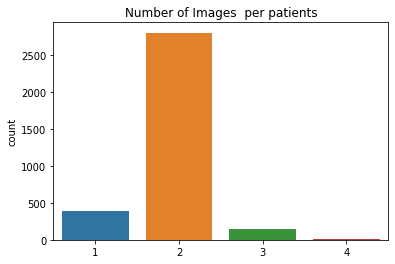

In [66]:
plt.title('Number of Images  per patients')
sns.countplot(list(images.values()))

In [67]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [68]:
def combining_images(image_set):
    
    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['filename'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [69]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [70]:
img_per_person_train

defaultdict(list,
            {'1_IM-0001': ['1_IM-0001-4001.dcm.png', '1_IM-0001-3001.dcm.png'],
             '2_IM-0652': ['2_IM-0652-1001.dcm.png', '2_IM-0652-2001.dcm.png'],
             '4_IM-2050': ['4_IM-2050-1001.dcm.png', '4_IM-2050-2001.dcm.png'],
             '5_IM-2117': ['5_IM-2117-1003002.dcm.png',
              '5_IM-2117-1004003.dcm.png'],
             '6_IM-2192': ['6_IM-2192-1001.dcm.png', '6_IM-2192-2001.dcm.png'],
             '7_IM-2263': ['7_IM-2263-1001.dcm.png', '7_IM-2263-2001.dcm.png'],
             '8_IM-2333': ['8_IM-2333-1001.dcm.png', '8_IM-2333-2001.dcm.png'],
             '9_IM-2407': ['9_IM-2407-1001.dcm.png',
              '9_IM-2407-2001.dcm.png',
              '899_IM-2407-1001.dcm.png',
              '899_IM-2407-2001.dcm.png'],
             '10_IM-0002': ['10_IM-0002-2001.dcm.png',
              '10_IM-0002-1001.dcm.png'],
             '11_IM-0067': ['11_IM-0067-1001.dcm.png',
              '11_IM-0067-2001.dcm.png'],
             '12_IM-0133': ['1

In [71]:
img_per_person_train['1173_IM-0118']

['1173_IM-0118-5001.dcm.png', '1173_IM-0118-1001.dcm.png']

In [72]:
def load_image(file):
    img = cv2.imread('/content/drive/MyDrive/FYP/images/'+file)
    return img

In [73]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break

846_IM-2368-0001


In [75]:
rem_path='/content/drive/MyDrive/FYP/images/'

Text(0.5, 1.0, '1144_IM-0097-1001.dcm.png')

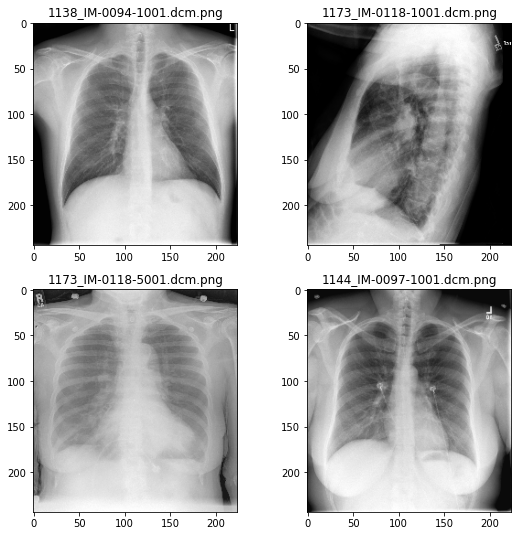

In [80]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('1138_IM-0094-1001.dcm.png'))
plt.title('1138_IM-0094-1001.dcm.png')
plt.subplot(222)
plt.imshow(load_image('1173_IM-0118-1001.dcm.png'))
plt.title('1173_IM-0118-1001.dcm.png')
plt.subplot(223)
plt.imshow(load_image('1173_IM-0118-5001.dcm.png'))
plt.title('1173_IM-0118-5001.dcm.png')
plt.subplot(224)
plt.imshow(load_image('1144_IM-0097-1001.dcm.png'))
plt.title('1144_IM-0097-1001.dcm.png')

###Data Prepration

In [83]:
#to iterate in the data structure
import itertools
def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

In [84]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)

In [85]:
train.head()

,Person_id,Image1,Image2,Report
0,1_IM-0001_0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size ar...
1,2_IM-0652_0,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,Borderline cardiomegaly. Midline sternotomy XX...
2,4_IM-2050_0,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,There are diffuse bilateral interstitial and a...
3,5_IM-2117_0,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,The cardiomediastinal silhouette and pulmonary...
4,6_IM-2192_0,6_IM-2192-1001.dcm.png,6_IM-2192-2001.dcm.png,Heart size and mediastinal contour are within ...


In [86]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')

###Text Data Preprocessing

In [87]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [88]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [89]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])

In [90]:
train

,Person_id,Image1,Image2,Report
0,1_IM-0001_0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,the cardiac silhouette and mediastinum size ar...
1,2_IM-0652_0,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,borderline cardiomegaly . midline sternotomy ...
2,4_IM-2050_0,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,there are diffuse bilateral interstitial and a...
3,5_IM-2117_0,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,the cardiomediastinal silhouette and pulmonary...
4,6_IM-2192_0,6_IM-2192-1001.dcm.png,6_IM-2192-2001.dcm.png,heart size and mediastinal contour are within ...
...,...,...,...,...
2748,2993_IM-1380_0,2993_IM-1380-1001.dcm.png,2993_IM-1380-2001.dcm.png,the lungs are clear without focal consolidatio...
2749,2994_IM-1380_0,2994_IM-1380-1001.dcm.png,2994_IM-1380-2001.dcm.png,the lungs are clear . there no pleural effusi...
2750,2997_IM-1381_0,2997_IM-1381-2001.dcm.png,2997_IM-1381-1001.dcm.png,lungs are clear without focal consolidation ef...
2751,2998_IM-1382_0,2998_IM-1382-1001.dcm.png,2998_IM-1382-2001.dcm.png,the lungs are clear bilaterally . specificall...


In [91]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')

In [92]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report

In [93]:
print('maximum word in a report is :',max(l))

maximum word in a report is : 153


Text(0, 0.5, 'Number of words')

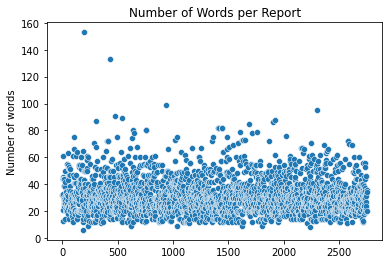

In [94]:
plt.title('Number of Words per Report')
sns.scatterplot(range(train.shape[0]), l)
plt.ylabel('Number of words')

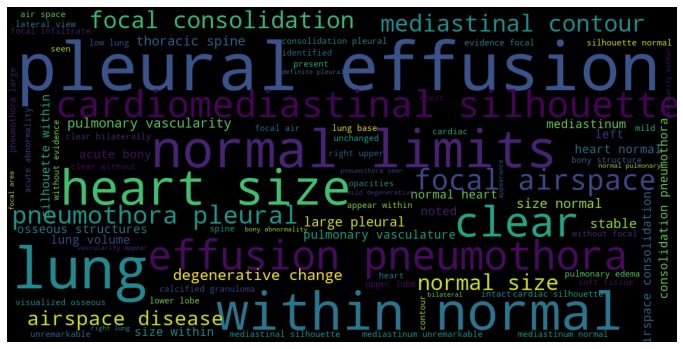

In [95]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])

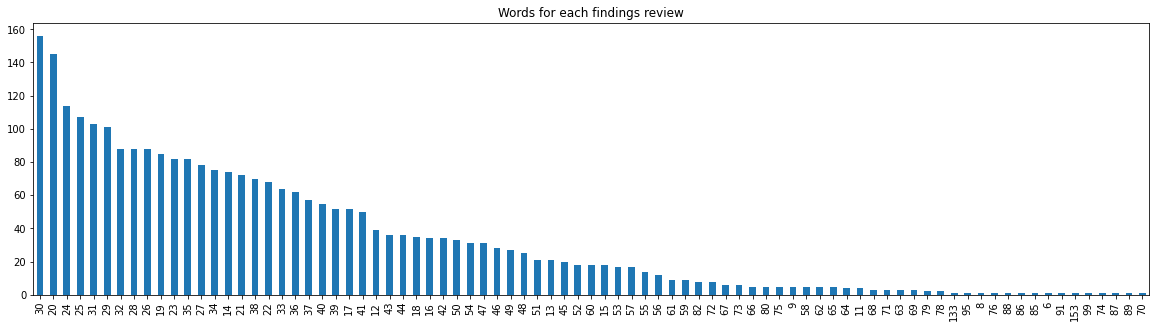

In [96]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [97]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [98]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

###Exporting final Dataset

In [99]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Train_Data.csv', index=False)
test.to_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Test_Data.csv', index=False)
cv.to_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_CV_Data.csv', index=False)